# Graduação em Matemática Aplicada e Ciência de Dados  
**Álgebra Linear Numérica**  
Bernardo Freitas Paulo da Costa  
Monitora: Beatriz Lúcia Teixeira de Souza  

## Projeto 4  
### Álgebra Linear e Matrizes Aleatórias  
**para 21 de Junho de 2025**  

---


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Gerando matriz aleatória m x n

def matrix(m, n):
    """
    Gera uma matriz aleatória de tamanho m x n.
    """
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Questão 1. Matrizes Gaussianas  
Uma matriz gaussiana tem todas as entradas \( A_{ij} \) independentes e distribuídas segundo uma normal padrão, ou seja, \( A_{ij} \sim \mathcal{N}(0,1) \).  

**a) Distribuição das normas.**  
Faça um histograma da norma-2 das colunas de uma matriz gaussiana \( A_{m \times n} \). Use vários valores de \( m \), e comente o que você observa.  



In [ ]:
sizes = [10, 20, 50, 100, 200, 500, 1000]
for i in sizes:
    norms = []
    m = i
    for k in sizes:
        n = i
        mx = matrix(m, n)
        for j in range (m):
            col = mx[:, j]
            norms.append(np.linalg.norm(col))    
        plt.hist(norms)
        plt.show()



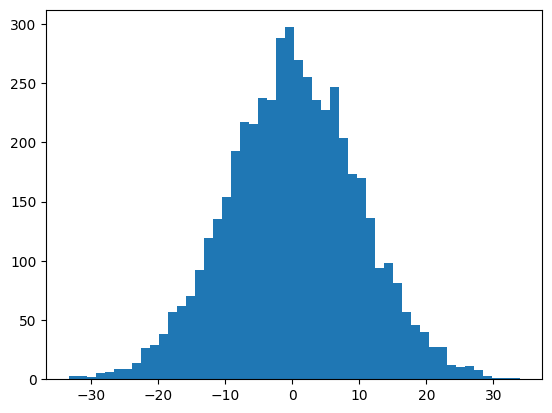

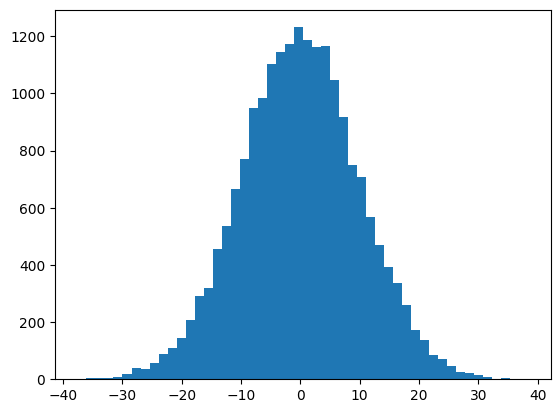

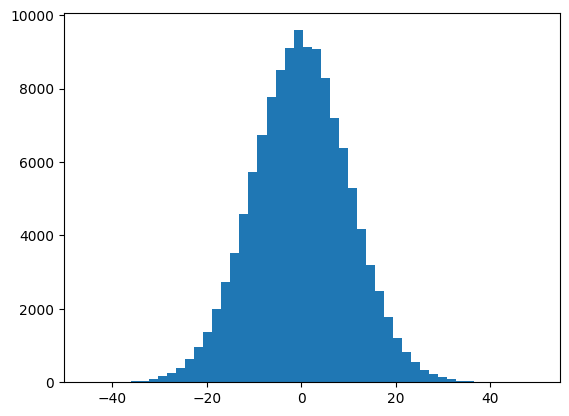

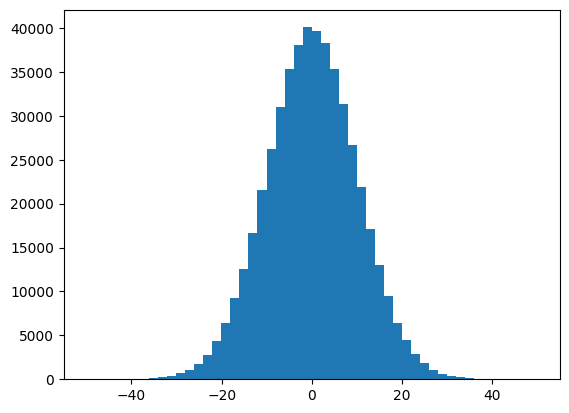

In [ ]:
m = 100
ns = [100, 200, 500, 1000]

for n in ns:
    
    mx = matrix(m, n)
    prod = mx.T @ mx
    indices = np.triu_indices(n, k=1)
    off_diagonal_products = prod[indices]
    
    plt.hist(off_diagonal_products, bins=50)
    plt.show()           

de novo, apresenta um comportamento normal, que se evidencia mais com o crescimento de M. Além de deixar a curva ainda mais facil de se observar, aurva se estreita, e e menos dados são observados nas caudas, evidenciando uma menor variancia (e por consequencia, desvio padrão).Se estima que com $x \to \inf$, o desvio padrão dessa diminua, enquanto, o valor esperado se mantenha como 0.
Infelismente, não consigo plotar uma matriz infinita, abaixo, faço uma grande o suficiente:

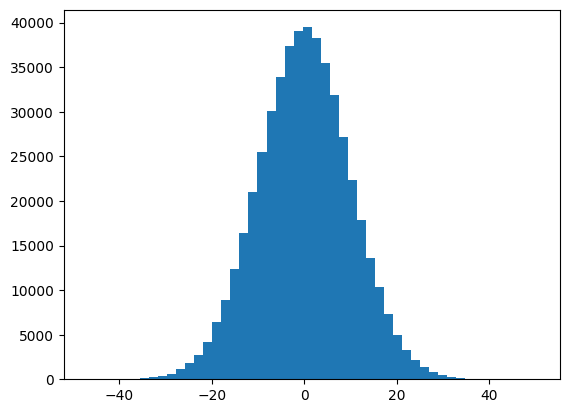

In [66]:
mx = matrix(m=100, n=30000)
prod = mx.T @ mx
indices = np.triu_indices(n, k=1)
off_diagonal_products = prod[indices]

plt.hist(off_diagonal_products, bins=50)
plt.show()         